In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
%matplotlib inline

We can access most of the typical probability distributions using the `scipy` `stats` module.

For discrete distributions, we'll ususally use the `pmf` or `cdf` methods.

For continuous distributions, we'll usually use the `pdf` or `cdf` methods.

## Bernoulli Distribution

Two possible outcomes: "success" and "failure". The probability of success is $p$, and the probability of failure is $1-p$.

If we let 1 correspond to success and 0 to failure, then the distribution looks like:

In [7]:
from scipy.stats import bernoulli

In [26]:
@interact(p = FloatSlider(value = 0.6, min = 0, max = 1, step = 0.05))
def bernoulli_pmf(p):
    x = [0,1]
    plt.bar(x = x, height = bernoulli.pmf(x, p = p), width = 0.25, edgecolor = 'black')
    plt.xticks(x)
    plt.ylim(0, 1);

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.05), Output()), _dom_classes=('w…

In [39]:
@interact(p = FloatSlider(value = 0.6, min = 0, max = 1, step = 0.05))
def bernoulli_cdf(p):
    x = np.linspace(start = -0.05, stop = 1.05)
    plt.plot(x, bernoulli.cdf(x, p = p))
    plt.ylim(0, 1);

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.05), Output()), _dom_classes=('w…

## Binomial Distribution

Repeated Bernoulli Trials.

Fixed number of trials ($n$), fixed probability of success ($p$). Gives probability for number of successes ($k$).

In [44]:
from scipy.stats import binom

In [49]:
@interact(p = FloatSlider(value = 0.6, min = 0, max = 1, step = 0.05),
         n = IntSlider(value = 10, min = 1, max = 100, step = 1))
def binomial_pmf(p, n):
    x = np.arange(start = 0, stop = n + 1, step = 1)
    plt.bar(x = x, height = binom.pmf(x, n = n, p = p), edgecolor = 'black')
    #plt.xticks(x);

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.05), IntSlider(value=10, descrip…

## Normal Distribution

An important continuous probability distribution is the **normal** distribution, also known as the Gaussian distribution.

It is symmetric and bell-shaped. Normal distributions are actually a family of distributions, determined by their mean ($\mu$) and standard deviation ($\sigma$). The following widget shows the effect of changing the mean or standard deviation.

In [39]:
from scipy.stats import norm

In [38]:
@interact(mu = FloatSlider(value = 0, min = -3, max = 3, step = 0.1),
         sigma = FloatSlider(value = 1, min = 0.1, max = 3, step = 0.1))
def normal_pdf(mu, sigma):
    x = np.arange(start = -4, stop = 4, step = 0.01)
    plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
    plt.fill_between(x, norm.pdf(x, loc = mu, scale = sigma))
    plt.hlines(y = 0, xmin = -4, xmax = 4, color = 'black')
    plt.xlim(-4, 4);

interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

The dataset NHANES_heights_weights.csv contains a sample of participants in the National Health and Nutrition Examination Survey. Specifically, it contains the heights and weights of all male participants between the ages of 30 and 40.

In [111]:
nhanes = pd.read_csv('../data/NHANES_heights_weights.csv')

In [112]:
nhanes.head()

,SEQN,weight_kg,height_cm,age,gender
0,83856.0,89.1,181.5,30.0,male
1,83863.0,95.8,175.6,35.0,male
2,83910.0,73.2,178.9,37.0,male
3,83931.0,78.7,174.0,37.0,male
4,84011.0,119.6,178.2,32.0,male


We can get a quick glimpse at the characteristics of the dataset using the `.describe()` method.

In [113]:
nhanes.height_cm.describe()

count    446.000000
mean     174.223767
std        7.770183
min      149.600000
25%      169.300000
50%      174.500000
75%      179.300000
max      193.800000
Name: height_cm, dtype: float64

In [114]:
import seaborn as sns

To get a better idea of the distribution of values, we can look at a distplot.

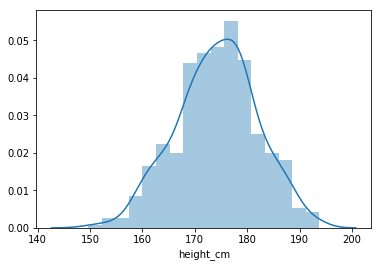

In [115]:
sns.distplot(nhanes.height_cm);

We can see that the data is roughly bell-shaped. There are some statistical tests which can be used to check whether a sample appears to have come from a normal distribution. 

Another option is to use what's called a quantile-quantile plot, or Q-Q plot. This type of plot can be used to assess whether it is plausible that a set of observations came from a particular distribution.

Specifically, a Q-Q plot is a scatterplot which shows the theoretical quantiles from the candidate distribution against the observed quantiles from the sample. If the plot is close to the identity plot (the diagonal line), then we can conclude that it is plausible (but not certain) that the sample came from that distribution. We'll use the following function to create our Q-Q plots. We just need to pass in the column of interest.

In [116]:
import statsmodels.api as sm
def make_qq_plot(data):
    mu = np.mean(data)
    sigma = np.std(data)
    
    sm.qqplot(data, line='45', loc = mu, scale = sigma);

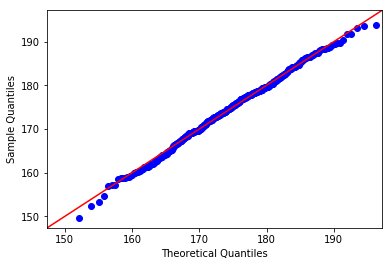

In [117]:
make_qq_plot(nhanes.height_cm)

We can see that, we just a few exceptions, the sample data hugs the diagonal line. We are probably safe to model the overall distribution using a normal distribution.

We'll approximate the population distribution using a normal distribution with the same mean and standard deviation as our sample.

In [118]:
mu = np.mean(nhanes.height_cm)
sigma = np.std(nhanes.height_cm)

print('mu = {}'.format(mu))
print('sigma = {}'.format(sigma))

mu = 174.22376681614358
sigma = 7.7614674413081355


Let's take a look at our hypothetical normal distribution against the sample data.

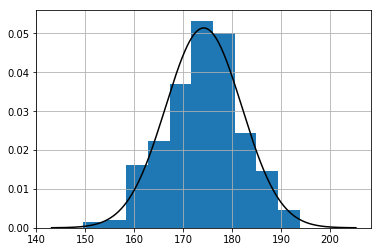

In [119]:
x = np.arange(start = -4 * sigma + mu, stop = 4 * sigma + mu, step = 0.01)
plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
nhanes.height_cm.hist(density = True);

We can see that it's not a perfect fit, but is reasonably close.

Using this distribution, we can make predictions about the overall population.

What proportion of 30 - 40 year-old males will be under 5 feet tall (152.4 cm)?

In [120]:
norm.cdf(152.4, loc = mu, scale = sigma)

0.0024631845766146664

What proportion of 30 - 40 year-old males will be over 6 feet tall (182.88 cm)?

In [121]:
1 - norm.cdf(182.88, loc = mu, scale = sigma)

0.13236457043542738

What proportion of 30 - 40 year-old males will be over 7 feet tall (213.36 cm)?

In [123]:
1 - norm.cdf(213.36, loc = mu, scale = sigma)

2.298939648648357e-07

What about weights?

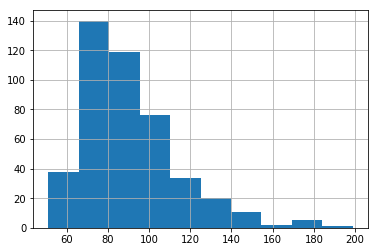

In [126]:
nhanes.weight_kg.hist();

It appears that weights are skewed to the right.

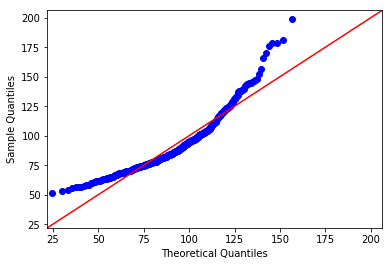

In [128]:
make_qq_plot(nhanes.weight_kg)

We can also see this in the Q-Q plot. The values in both the upper and lower quantiles are way larger than would be expected from a normal distribution.

Distributions with a large tail on the right can sometimes be approximated with a normal distribution after transforming the values. A common transformation is the logarithm.

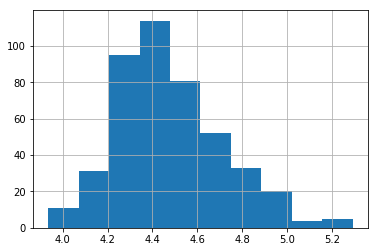

In [130]:
nhanes.weight_kg.apply(np.log).hist();

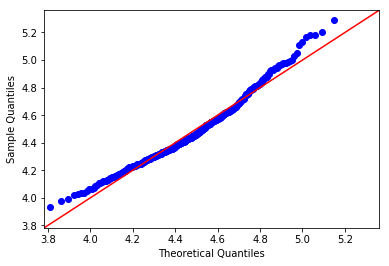

In [132]:
make_qq_plot(nhanes.weight_kg.apply(np.log))

It is still somewhat skewed to the right, but we are probably okay to make some estimates.

In [138]:
mu = np.mean(nhanes.weight_kg.apply(np.log))
sigma = np.std(nhanes.weight_kg.apply(np.log))

print('mu = {}'.format(mu))
print('sigma = {}'.format(sigma))

mu = 4.478150660412695
sigma = 0.23528831433228936


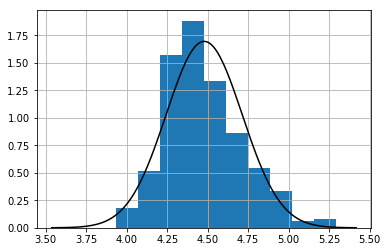

In [134]:
x = np.arange(start = -4 * sigma + mu, stop = 4 * sigma + mu, step = 0.01)
plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
nhanes.weight_kg.apply(np.log).hist(density = True);

What proportion of males between the age of 30 and 40 do we expect to weight less than 100 lbs (45.3592 kg)?

In [136]:
norm.cdf(np.log(45.3592), loc = mu, scale = sigma)

0.0024004005088118997

What proportion do we expect to weight more than 300 lbs (136.078 kg)?

In [141]:
1 - norm.cdf(np.log(136.078), loc = mu, scale = sigma)

0.03221985620600554

## Poisson Distribution

The Poisson distribution is useful for cases where we wish to predict the number of events happending in a fixed interval of time (or space).

For example, we might be trying to model the number of hurricanes in a given year or the number of visitors to a website in a given hour.

There are certain assumptions which must be met to use a Poisson distribution:

* $k$ is the number of times an event occurs in an interval and $k$ can take values 0, 1, 2, ....
* The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
* The average rate at which events occur is independent of any occurrences. For simplicity, this is usually assumed to be constant, but may in practice vary with time.
* Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur.

The file `fatal_crashes_2018.csv` contains a count, by day, of the number of fatal crashes that were reported in Davidson County in 2018.

In [4]:
fatal_crashes = pd.read_csv('../data/fatal_crash_counts_2018.csv')

In [5]:
fatal_crashes.head()

,date,num_fatal_crash
0,2018-01-01,0
1,2018-01-02,0
2,2018-01-03,1
3,2018-01-04,0
4,2018-01-05,0


We can look at the number of occurrences per day for the year:

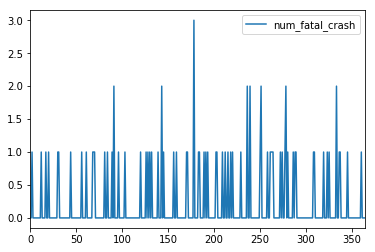

In [7]:
fatal_crashes.plot();

We can see that there was one day with three fatal crashes, a few days with two, many days with one, but the majority have zero.

In [8]:
fatal_crashes.num_fatal_crash.value_counts()

0    294
1     63
2      7
3      1
Name: num_fatal_crash, dtype: int64

To use a Poisson distribution, we need to know the average number of occurrences in the unit of time that we're interested in. Here, we'll use one day as our unit of time.

In [11]:
rate = fatal_crashes.num_fatal_crash.mean()
rate

0.2191780821917808

In [13]:
from scipy.stats import poisson

Let's see how well the Poisson distribution approximates what we say in the data. Let's look at the probability of each number of occurrences vs. what we observed. Recall that we need to use a probability *mass* function, since the Poisson distribution is a discrete probability distribution.

In [20]:
poisson_probabilities = poisson.pmf([0,1,2,3,4], mu = rate)

In [21]:
observed_probabilities = fatal_crashes.num_fatal_crash.value_counts(normalize = True).tolist() + [0]

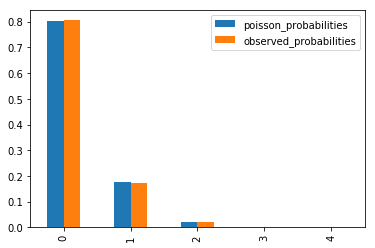

In [24]:
pd.DataFrame({'poisson_probabilities': poisson_probabilities, 'observed_probabilities': observed_probabilities}).plot(kind = 'bar');

If we adopt this Poisson model, then we use it to make estimates:

What is the probability of 1 or fewer fatal crashes on a given day?

In [25]:
poisson.cdf(1, mu = rate)

0.9792178349352485

What is the probability of at 3 or more fatal crashes?

In [26]:
1 - poisson.cdf(2, mu = rate)

0.0014902021785406783

## Exponential Distribution

Related to Poisson distributions are exponential distributions. Exponential distributions describe the wait times until the next occurrence of a poisson distribution.

The standard deviation and mean of an exponential distribution are equal to $1/rate$, where rate is the rate from the poisson process.

In [32]:
from scipy.stats import expon

In [33]:
@interact(rate = FloatSlider(value = 1, min = 0.1, max = 5)) # average number of events per interval
def expon_plot(rate):
    x = np.arange(start = -4, stop = 5, step = 0.01)
    plt.plot(x, expon.pdf(x, scale = 1/rate), color = 'black')
    plt.fill_between(x, expon.pdf(x, scale = 1/rate))
    plt.hlines(y = 0, xmin = 0, xmax = 5, color = 'black')
    plt.xlim(-0.1, 5);

interactive(children=(FloatSlider(value=1.0, description='rate', max=5.0, min=0.1), Output()), _dom_classes=('…

In our case, we might be interested in estimating how long until the next fatal crash.
What is the probability of the next fatal crash ocurring in the next day?

In [34]:
expon.cdf(x = 1, scale = 1/rate)

0.19682132640142544

What is the probability of at least one fatal crash in the next week?

In [35]:
expon.cdf(x = 7, scale = 1/rate)

0.784381918032991

What is the probability of no fatal crashes in the next two weeks?

In [36]:
1 - expon.cdf(x = 14, scale = 1/rate)

0.046491157271131844